<a href="https://colab.research.google.com/github/yooburi/alone_DL_study/blob/main/alone_study_deaplearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 혼자 공부하는 머신러닝+딥러닝
Chapter 4&7

## Chapter 4-1 로지스틱 회귀



우선 사이킷런의 k-최근접 이웃 분류기로 클래스 확률을 계산하여보자.

In [ ]:
#데이터 준비하기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


위 형식은 데이터 프레임인데 이는 pandas에서 제공하는 2차원 표 형식의 주요 데이터 구조이다.


In [ ]:
print(pd.unique(fish['Species'])) #7종류의 생선이 있다.

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


데이터 프레임에서 species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용할 것이다.

> 데이터 프레임의 원하는 열을 학습을 위해 numpy화 해야한다.

species 열이 아닌 다른 5개의 열 선택하는 방법은?

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5]) #처음 5개행 확인함.

fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42) #train 과 test set 나눔.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) #표준화 전처리. 훈련 데이터의 통계값으로 테스트도 변환해야함. 스케일 맞추기

> **입력 데이터를 훈련, 테스트 데이터로 나누고 스케일도 맞추어 주었다. 즉, 학습 데이터가 준비되었다는 뜻이다.**

In [ ]:
#k-최근접 이웃 분류기로 확률을 계산해보자.

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


현재 타깃 데이터(정답 데이터)에 들어있는 것은 생선의 종류.. 즉, 클래스의 이름들이다. 총 7개가 있고 **두 개 이상의 클래스를 분류해야 하는 문제를 다중 분류라고 부른다. multi-class classification**

\

다중 분류 문제 또한 위 코드에서 보는 것과 같이 이진 분류와 모델을 만들고 훈련하는 방식이 동일하다.
> **이진 분류를 사용했을 때는 양성 클래스와 음성 클래스 0과 1로 지정하여 타깃 데이터를 만들었다. 다중 분류에서는 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서 문자열로 된 타깃값을 그대로 사용할 수 있다.**

분류기에서 정렬된 타깃값은 classes_ 변수에 저장되어 있고, 테스트 세트의 첫 샘플 5개에 대해 예측을 해보면 아래와 같이 예측을 하게 된다.

In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])

print(kn.classes_) #분류기에서 정렬된 타깃값.
print(kn.predict(test_scaled[:5]))
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba()함수를 이용하여 클래스별 확률값을 반환할 수 있다.

네번째 샘플의 최근접 이웃 클래스를 확인해보자.

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


 3개의 최근접 이웃을 이용하기 때문에 0, 1/3, 2/3, 3/3이 전부이다..

\

---
### 로지스틱 회귀
이름은 회귀지만 분류 모델이다. 선형 회귀와 동일하게 선형 방정식을 학습한다.

예를 들면..
$${z = a * (Weight) + b *(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f}$$

여기에서  a,b,c,d,e는 가중치 혹은 계수이다. **특성은 늘어났지만 다중 회귀를 위한 선형 방정식과 같다.** z는 어떤 값도 가능하게 된다.

\

**시그모이드 함수**

시그모이드 함수를 이용하면 z가 아주 작은 음수일 때는 0이 되고, 아주 큰 양수일 때는 1이 되도록 바꿀 수 있다.

<img src="https://cdn.rgbitcode.com/images/2024/2/14/senspond/55/bkgB7apFELxuXq-CP.png" width="500" height="400"/>


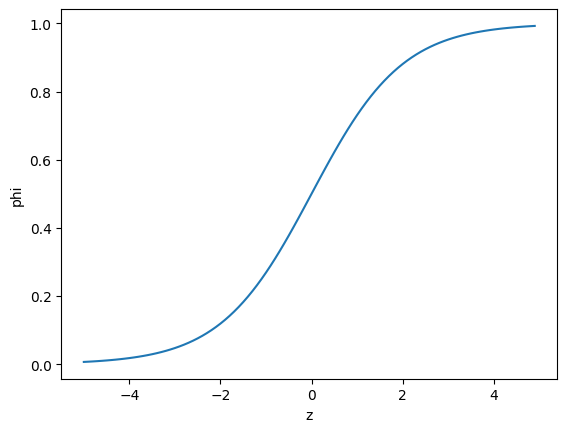

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

\

### 로지스틱 회귀로 이진 분류
넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 불리언 인덱싱이라고 한다.

이를 이용해 훈련 세트에서 특정 행만 골라서 사용해보자. 특정 행을 True로 뽑아서 골라 사용하기 위해.


In [14]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 특정 행 불러내서 저장하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [19]:
print(lr.classes_)
print(lr.predict(train_bream_smelt[:5]))

print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


로지스틱 회귀가 학습한 계수를 확인해 보자.

In [20]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


따라서 로지스틱 회귀가 학습한 방정식은 다음과 같다.
$${z = -0.404*Weight -0.576*Length -0.663*Diagonal -1.013*Height -0.732*Width -2.161}$$

이 방정식을 이용하여 샘플 5개의 z값을 출력해보자.

In [21]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


이렇게 나온 z값을 시그모이드 함수에 출력하면 확률을 얻을 수 있는 것이다.

In [22]:
from scipy.special import expit

print(expit(decisions)) #양성 클래스(1)에 대한 z값을 사용하여 확률을 반환한다.

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


\

### 로지스틱 회귀로 다중 분류
